<a href="https://colab.research.google.com/github/camayli/Aprendizaje-Automatico-I-Practica-4/blob/main/Practica_4_Algoritmos_de_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4: Algoritmos de clustering**

Riveros Camilo

Objetivo:
El objetivo de la práctica es entender bien cómo funcionan los algoritmos de clustering vistos en
teoría: k-means, clustering jerárquico aglomerativo, DBSCAN y mean shift. Puedes hacer la
práctica en un editor de Python (como PyCharm o Spyder), o en un cuaderno de Jupyter.

In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, MiniBatchKMeans, OPTICS
from sklearn.neighbors import NearestNeighbors
import time
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
#Cargar la BD en este caso voy a tomar la de wine
wine = load_wine()
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

**Ejercicio 1**
Prueba el método de k-means sobre (las dos primeras columnas de) algún dataset con inicialización aleatoria y con la versión mejorada k-means ++, para el número k que consideres adecuado. Muestra gráficamente el resultado. Aplica el método del codo para elegir el número k que funcione mejor.
Para importar algún dataset, puedes ver los que incluye directamente scikit-learn (https://scikitlearn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets ).


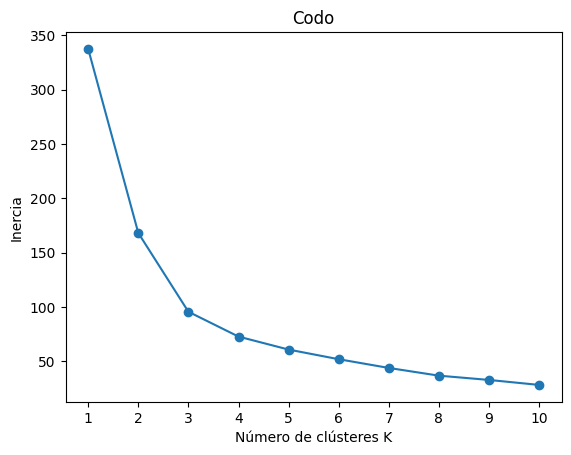

In [ ]:
#Obtencion del codo
inercias = []
K_vals = range(1, 11)
X = wine.data[:, :2]
for k in K_vals:
    km = KMeans(n_clusters=k,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=1000)
    km.fit(X)
    inercias.append(km.inertia_)

plt.plot(K_vals, inercias, marker="o")
plt.xlabel("Número de clústeres K")
plt.ylabel("Inercia")
plt.title("Codo")
plt.xticks(K_vals)
plt.show()

Se podria deducir que el mayor cambio sobre el eje inercia seria 3, sobre todos los valores de cluster

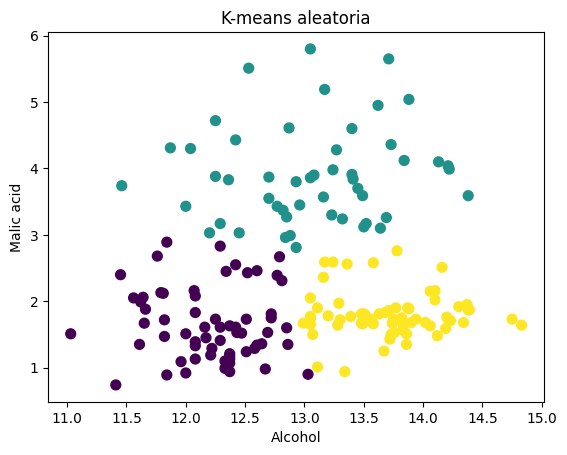

In [ ]:
K = 3

# K-means aleatoria
km_rand = KMeans(n_clusters=K,
                 init='random',
                 n_init=10,
                 max_iter=300,
                 random_state=1000)
Y_km_rand = km_rand.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_km_rand, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("K-means aleatoria")
plt.show()

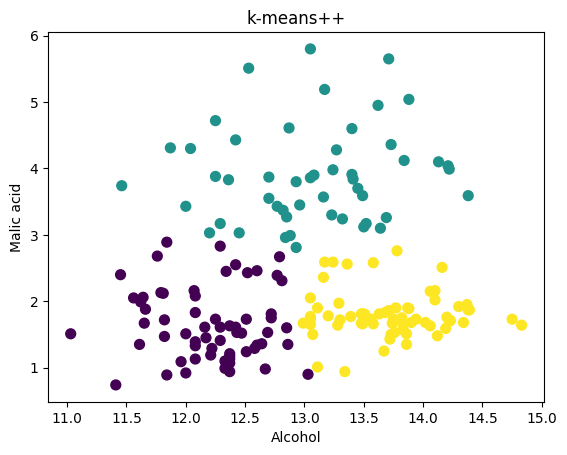

In [ ]:
# K-means++
km_pp = KMeans(n_clusters=K,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=1000)
Y_km_pp = km_pp.fit_predict(X)

print()

plt.scatter(X[:, 0], X[:, 1], c=Y_km_pp, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("k-means++")
plt.show()

**Ejercicio 2**
Prueba el método de clustering jerárquico aglomerativo (AgglomerativeClustering en scikitlearn) sobre el dataset anterior con los cuatro tipos de enlace disponibles: “single”, “complete”, “average” y “ward” y con las distancias vistas en el tema 2: “euclidean”, “manhattan” y “cosine” (el tipo de enlace “ward” solo está disponible para la distancia euclídea). Muestra por pantalla
gráficamente los clústeres que se obtienen en cada uno de ellos y comenta cuál de las opciones crees que da el mejor resultado. Puedes visualizar uno de los dendogramas para obtener el número de clústeres (si no lo sabes de antemano).

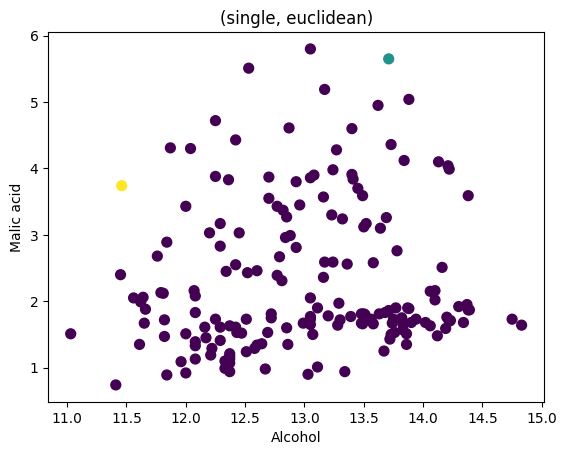

In [ ]:
#Single eucladiana
ag_single_eucl = AgglomerativeClustering(n_clusters=3,
                                         metric='euclidean',
                                         linkage='single')
Y_single_eucl = ag_single_eucl.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_single_eucl, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("(single, euclidean)")
plt.show()

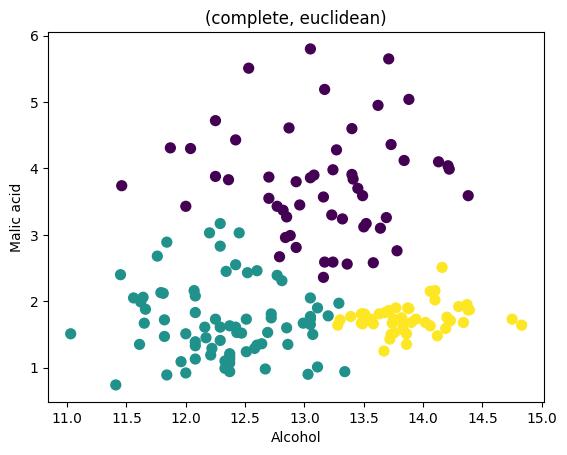

In [ ]:
#Compelte eucladiana
ag_complete_eucl = AgglomerativeClustering(n_clusters=3,
                                           metric='euclidean',
                                           linkage='complete')
Y_complete_eucl = ag_complete_eucl.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_complete_eucl, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("(complete, euclidean)")
plt.show()

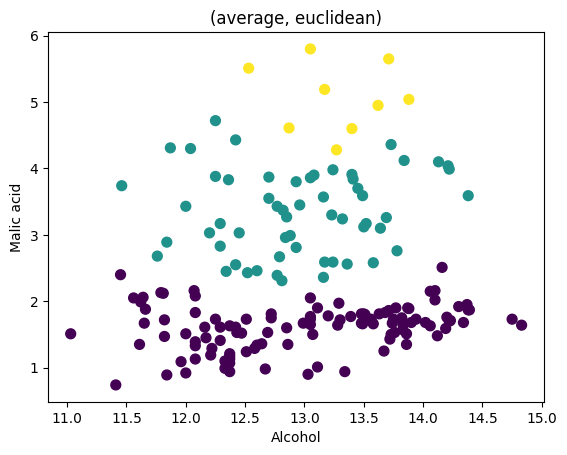

In [ ]:
#Average eucladiana
ag_average_eucl = AgglomerativeClustering(n_clusters=3,
                                          metric='euclidean',
                                          linkage='average')
Y_average_eucl = ag_average_eucl.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_average_eucl, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("(average, euclidean)")
plt.show()

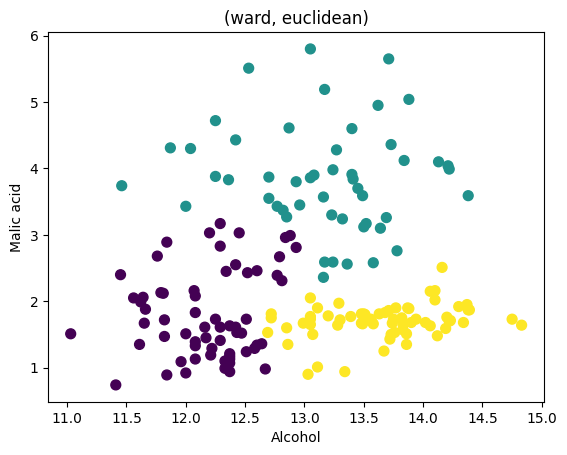

In [ ]:
#Ward
ag_ward = AgglomerativeClustering(n_clusters=3,
                                  metric='euclidean',
                                  linkage='ward')
Y_ward = ag_ward.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_ward, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("(ward, euclidean)")
plt.show()

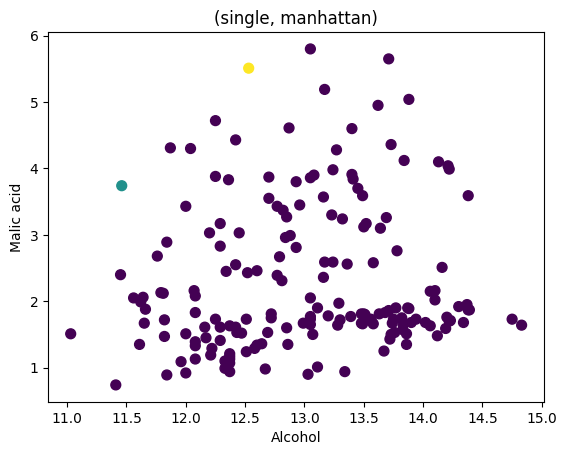

In [ ]:
#Single Manhattan
ag_single_manh = AgglomerativeClustering(n_clusters=3,
                                         metric='manhattan',
                                         linkage='single')
Y_single_manh = ag_single_manh.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_single_manh, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("(single, manhattan)")
plt.show()

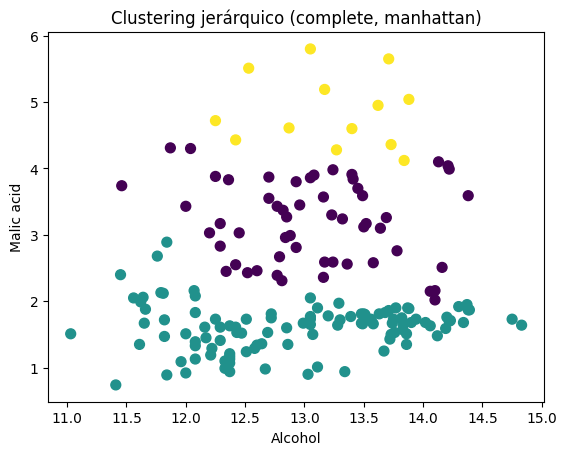

In [ ]:
#Complete Manhattan
ag_complete_manh = AgglomerativeClustering(n_clusters=3,
                                           metric='manhattan',
                                           linkage='complete')
Y_complete_manh = ag_complete_manh.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_complete_manh, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("Clustering jerárquico (complete, manhattan)")
plt.show()

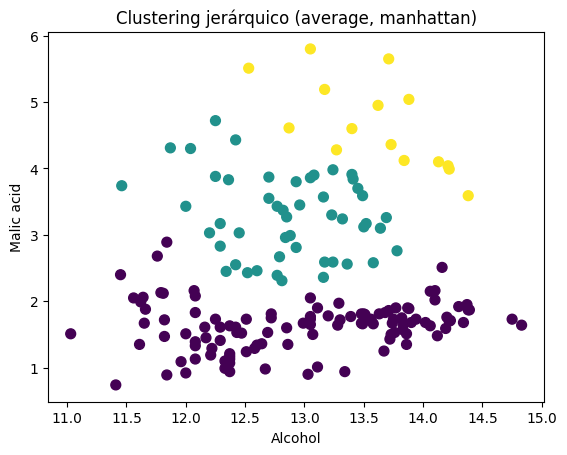

In [ ]:
#Average Manhattan
ag_average_manh = AgglomerativeClustering(n_clusters=3,
                                          metric='manhattan',
                                          linkage='average')
Y_average_manh = ag_average_manh.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_average_manh, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("Clustering jerárquico (average, manhattan)")
plt.show()

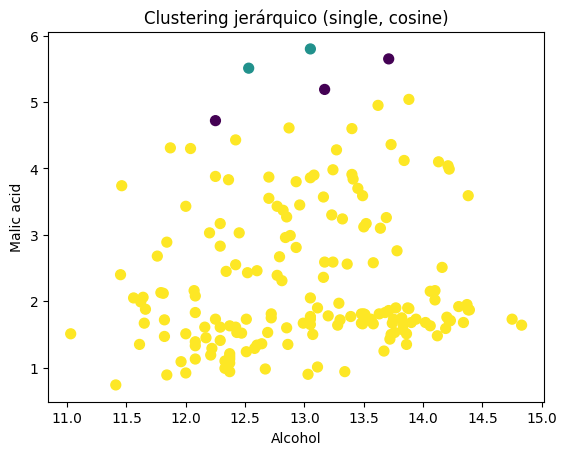

In [ ]:
#Single Cosine
ag_single_cos = AgglomerativeClustering(n_clusters=3,
                                        metric='cosine',
                                        linkage='single')
Y_single_cos = ag_single_cos.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_single_cos, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("Clustering jerárquico (single, cosine)")
plt.show()

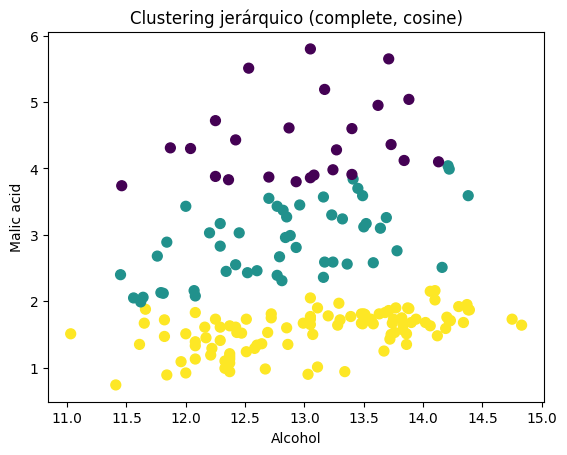

In [ ]:
#Complete consine
ag_complete_cos = AgglomerativeClustering(n_clusters=3,
                                          metric='cosine',
                                          linkage='complete')
Y_complete_cos = ag_complete_cos.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_complete_cos, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("Clustering jerárquico (complete, cosine)")
plt.show()

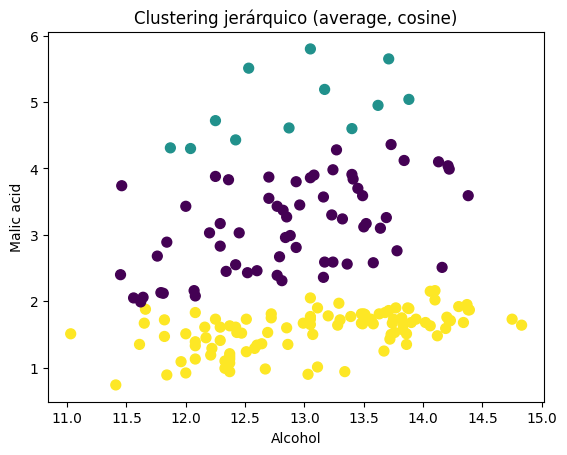

In [ ]:
#Average Cosine
ag_average_cos = AgglomerativeClustering(n_clusters=3,
                                         metric='cosine',
                                         linkage='average')
Y_average_cos = ag_average_cos.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=Y_average_cos, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.title("Clustering jerárquico (average, cosine)")
plt.show()

**Ejercicio 3**
Construye tres datasets con 6 puntos para los que se obtengan los siguientes dendogramas considerando como enlace la distancia del mínimo (single), máximo (complete) y media (average) respectivamente. No hace falta que las alturas obtenidas sean exactamente las mismas, pero sí que los puntos se unan en el orden correcto.

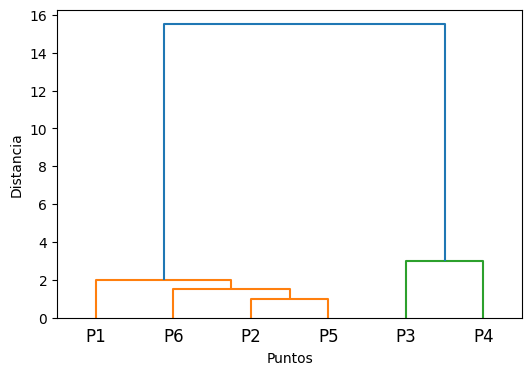

In [ ]:
#Conjunto
X_single = np.array([[1], [1.8], [2], [2.5], [6], [6.2]])

#Single
X1 = np.array([14.5, 10.0, 30.0, 33.0, 11.0, 12.5]).reshape(-1, 1)
labels1 = ["P1", "P2", "P3", "P4", "P5", "P6"]

Z1 = linkage(X1, method="single")
plt.figure(figsize=(6, 4))
dendrogram(Z1, labels=labels1)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.show()

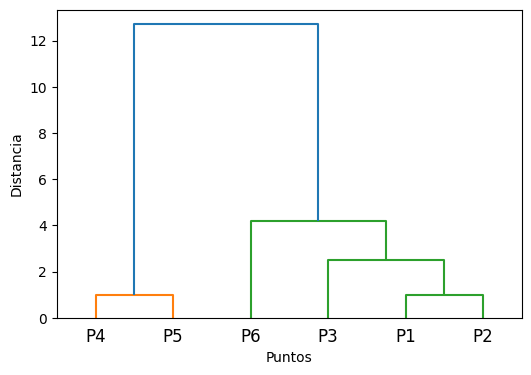

In [ ]:
#Complete
X2 = np.array([10.0, 11.0, 12.5, 20.0, 21.0, 8.3]).reshape(-1, 1)
labels2 = ["P1", "P2", "P3", "P4", "P5", "P6"]

Z2 = linkage(X2, method="complete")
plt.figure(figsize=(6, 4))
dendrogram(Z2, labels=labels2)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.show()

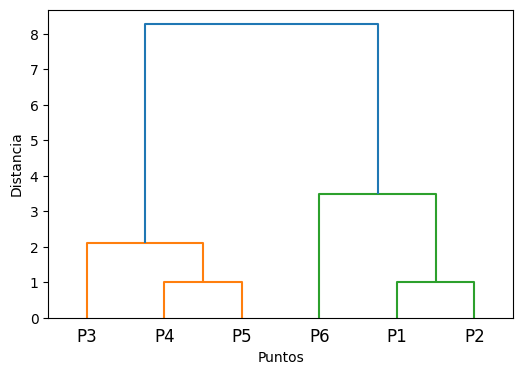

In [ ]:
#average
X3 = np.array([8.0, 9.0, 0.0, 1.6, 2.6, 12.0]).reshape(-1, 1)
labels3 = ["P1", "P2", "P3", "P4", "P5", "P6"]

Z3 = linkage(X3, method="average")
plt.figure(figsize=(6, 4))
dendrogram(Z3, labels=labels3)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.show()

**Ejercicio 4**
Dada la siguiente matriz de enlace o linkage (correspondiente al dendograma 1 del ejercicio anterior), explica con palabras lo que significan las primeras 3 filas.

[[1, 4, 1.55241747, 2],

[5, 6, 1.67630546, 3],

[0, 7, 1.80277564, 4],

[2, 3, 3.04138127, 2],

[8, 9, 4.42831797, 6]]

En el orden tenemos las iteraciones donde se van uniendo por distancia los puntos en el eje X

[Punto de origen, Punto destino, distancia, tamaño del grupo de cluster] Y nuestro indice de 6 elementos es de 0 a 5

Es decir con el ejemplo:

[1, 4, 1.5524, 2]
Se unen los puntos 1 y 4. Distancia: 1.5524.
Distancia: 1.5524
Se crea un nuevo clúster con 2 puntos.

[5, 6, 1.6763, 3]
El clúster recién creado (que contiene {1,4}) se une con el punto 6.
Distancia: 1.6763.
El nuevo clúster ahora tiene 3 puntos.

[0, 7, 1.8028, 4]
El punto 0 se une al clúster anterior (que contiene {1,4,6}).
Distancia: 1.8028.
El clúster resultante queda con 4 puntos.

[2, 3, 3.0414, 2]
Se unen los puntos 2 y 3. Distancia: 3.0414.
Distancia 3.0414
Forman un clúster de 2 puntos.

[8, 9, 4.4283, 6]
Se une el clúster de 4 puntos con el clúster de 2 puntos.
Distancia: 4.4283.
Se forma el clúster final de 6 puntos.


**Ejercicio 5**
Prueba el algoritmo DBSCAN sobre el dataset de los ejercicios 1 y 2 con la distancia euclídea, mostrando gráficamente los clústeres obtenidos. Modifica los parámetros eps y min_samples hasta lograr el resultado que consideres mejor. Para determinar eps, puedes utilizar las ideas vistas en el cuaderno de Jupyter de teoría: tema3_03_DBSCAN.ipybn. Prueba con otras distancias (diferentes de la euclídea), muestra gráficamente los clústeres y comenta cuáles son los resultados obtenidos.

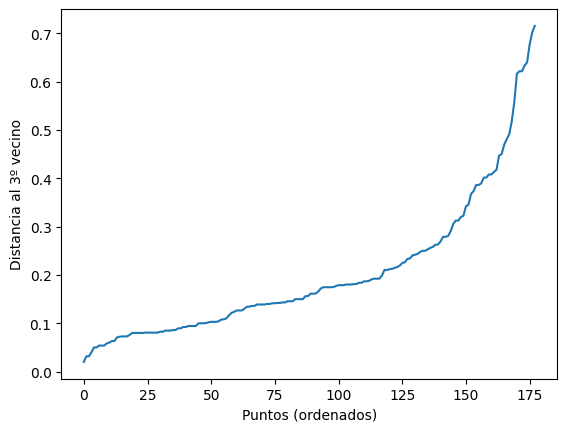

In [ ]:
#Cargar de nuevo los datos para tenerlos por default
wine = load_wine()
X = wine.data[:, :2]   # Alcohol, Malic acid
y_true = wine.target

# Gráfica k-distancia con k=3
k = 3
vecinos = NearestNeighbors(n_neighbors=k)
vecinos.fit(X)
distancias, indices = vecinos.kneighbors(X)

#dist 3
dist_k = np.sort(distancias[:, k-1])

#Puntos ordenados vs distancia al vecino
plt.figure()
plt.plot(dist_k)
plt.xlabel("Puntos (ordenados)")
plt.ylabel(f"Distancia al {k}º vecino")
plt.show()

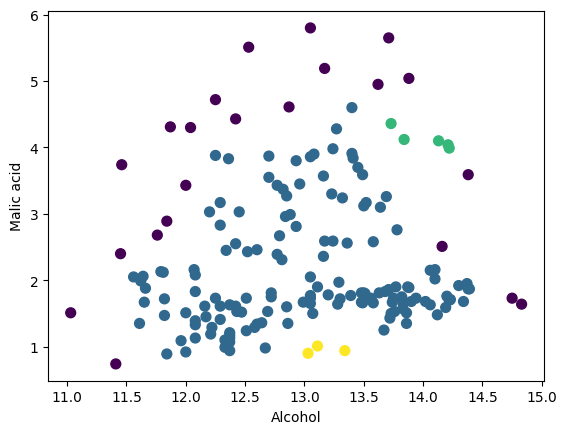

Etiquetas (euclidean): [-1  0  1  2]
Puntos ruido (euclidean): 22


In [ ]:
#Eucladiana
eps = 0.35
Nmin = 3     # min_samples
db_eucl = DBSCAN(eps=eps, min_samples=Nmin, metric='euclidean')
Y_eucl = db_eucl.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y_eucl, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.show()

print("Etiquetas (euclidean):", np.unique(Y_eucl))
print("Puntos ruido (euclidean):", np.sum(Y_eucl == -1))


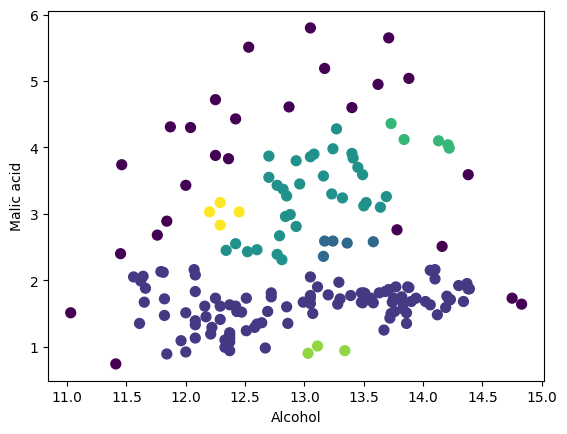

Etiquetas (manhattan): [-1  0  1  2  3  4  5]
Puntos ruido (manhattan): 26


In [ ]:
#Manhatan
db_manh = DBSCAN(eps=eps, min_samples=Nmin, metric='manhattan')
Y_manh = db_manh.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y_manh, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.show()

print("Etiquetas (manhattan):", np.unique(Y_manh))
print("Puntos ruido (manhattan):", np.sum(Y_manh == -1))

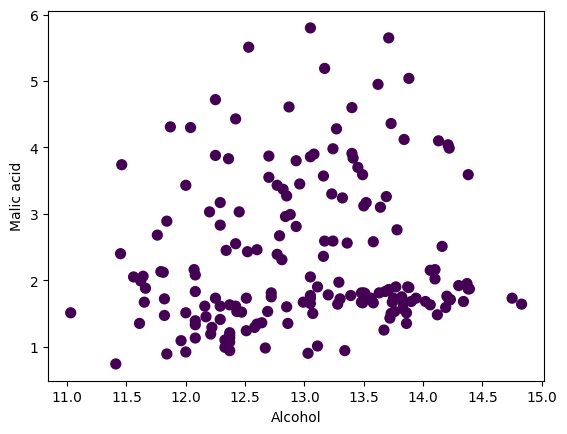

Etiquetas (cosine): [0]
Puntos ruido (cosine): 0


In [ ]:
#Cosine
db_cos = DBSCAN(eps=eps, min_samples=Nmin, metric='cosine')
Y_cos = db_cos.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y_cos, s=50)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.show()

print("Etiquetas (cosine):", np.unique(Y_cos))
print("Puntos ruido (cosine):", np.sum(Y_cos == -1))

Se selecciono una distancia K de 3 y siguiendo la idea del cuaderno, escogí epsilon 0.35 y Nmin = 3. Valide varias metricas y vi que con distancia euclídea los clusteres quedaban mejor separados y con un ruido razonable. Con Manhattan y Coseno las agrupaciones salian menos claras o con más ruido. Por eso, la configuración que mejor funciona aquí es el de epsilon 0.35, Nmin = 3 y distancia euclídea.

**Ejercicio 6**
Prueba el algoritmo mean shift sobre el dataset anterior, mostrando gráficamente los clústeres obtenidos. Modifica el parámetro bandwidth hasta lograr el resultado que consideres mejor.

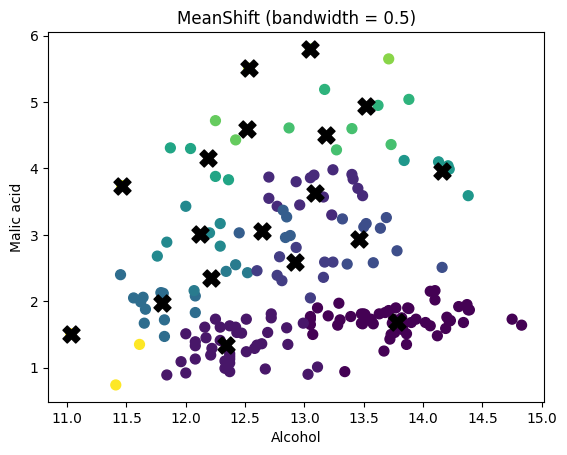

bandwidth = 0.5 n_clusters = 18


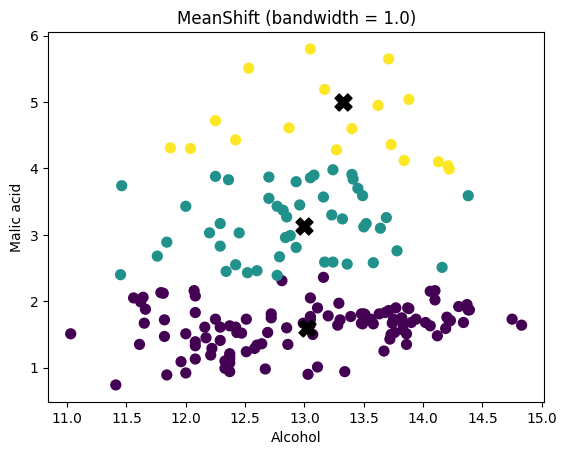

bandwidth = 1.0 n_clusters = 3


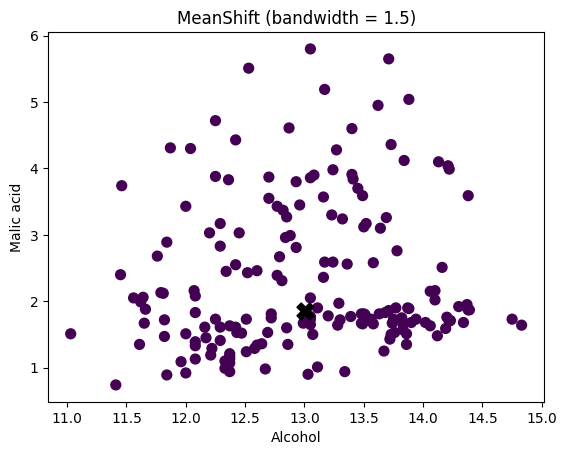

bandwidth = 1.5 n_clusters = 1


In [ ]:
#Cargamos nuevamente el dataset
wine = load_wine()
X = wine.data[:, :2]
y_true = wine.target

#Bandwidth
bandwidth_values = [0.5, 1.0, 1.5]   # valores de ejemplo; puedes ajustarlos

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    Y_ms = ms.fit_predict(X)
    centers = ms.cluster_centers_

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=Y_ms, s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c="black", s=150, marker="X")
    plt.xlabel("Alcohol")
    plt.ylabel("Malic acid")
    plt.title(f"MeanShift (bandwidth = {bw})")
    plt.show()

    print(f"bandwidth = {bw} n_clusters =", len(np.unique(Y_ms)))

Para este ejercicio el valor de bandwidth que daba un número de clústeres intermedio y que, visualmente, tenía más sentido: pocos grupos, bien separados entre sí y sin romper el conjunto de datos en trocitos innecesarios. Al representar los centroides  y los clusteres.

**Ejercicio 7**
Dados los siguientes datasets (los colores indican la partición original, que se supone conocida), indica para cada uno de ellos qué algoritmo o algoritmos de clustering (k-means, clústering jerárquico aglomerativo con los distintos tipos de enlace, DBSCAN o mean shift) crees que producirán mejores resultados.
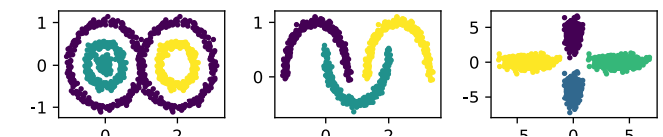

**1er Grafico:** Se tienen formas circulares por lo cual se descarta K-means y Mean Shift. Quedandonos DBSCAN ya que agrupa por densidad y clustering jerarquico con enlace simple ya que la union minima entre puntos permite crear los dos circulos sin cruzarse

**2do Grafico:** Se tienen formas convexas por lo cual se descarta K-means y Mean Shift. Quedandonos DBSCAN ya que agrupa por densidad y clustering jerarquico con enlace simple ya que por medio de la union de puntos de cadena podria generar esas formas convexas

**3er Grafico** Se tienen formas acumuladas con forma cartesiana.Por lo cual nos permite usar K-means, Clustering jerárquico aglomerativo con enlace Ward y mean shift ya que estos permiten el manejo de instancias convexas acumulativas

**Ejercicio 8:**
Completa los * en las siguientes matrices de enlace con valores que sean coherentes:

**Matriz 1**


[[0 , 1 , 1 ,* ],


[2 , * , *, 2 ],


[4, 5, * , 3],


[6, 7, 4.1, *]]


**Matriz 2**


[[1, * , *, 2],


 [3, *, 2.9, 3 ],


 [*,* , 4 , 2 ],


 [*, 7 , *, 5]]

**Matriz 1**

[[0, 1, 1.0, 2] - Se unen los puntos 0 y 1 - Se forma un cluster nuevo con 2 puntos.

 [2, 3, 1.2, 2] - Se unen los puntos 2 y 3 - Se forma otro cluster nuevo con 2 puntos.

 [4, 5, 2.0, 3] - El punto 4 se une con el cluster 5 - El nuevo cluster tiene 3 puntos.

 [6, 7, 4.1, 5]] - Se une el clúster 6 con el clúster 7 - El cluster al final tiene 5 puntos.